In [ ]:
# Importando bibliotecas
import contextily
import pandas
from geobr import read_state
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Lendo o CSV

df = pandas.read_csv("dadosqueimadas.444354.csv")

In [ ]:
# Tipos de dados em cada coluna

df.dtypes

,0
DataHora,object
Satelite,object
Pais,object
Estado,object
Municipio,object
Bioma,object
DiaSemChuva,float64
Precipitacao,float64
RiscoFogo,float64
Latitude,float64


In [ ]:
# Sumarizando dados
# OBS: FRP - “Fire Radiative Power” ou Potência Radiativa do Fogo, mede a energia radiante liberada por unidade de tempo, associada à taxa de queima da vegetação, em MW - megawatts

df.describe()

,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,348681.000000,348681.000000,348681.000000,368234.000000,368234.000000,368234.000000
mean,23.235017,0.274973,-6.484296,-11.093733,-58.882798,65.587399
std,101.298379,2.098987,85.257645,10.485585,8.172628,150.361958
min,-999.000000,0.000000,-999.000000,-53.662700,-91.524770,0.000000
25%,7.000000,0.000000,0.830000,-17.443625,-63.978245,14.400000
50%,20.000000,0.000000,1.000000,-11.691425,-59.185145,27.800000
75%,45.000000,0.000000,1.000000,-6.610783,-53.595890,59.700000
max,120.000000,118.770000,1.000000,11.950570,-34.827430,8094.300000


In [ ]:
# Primeiras cinco linhas de dados

df.head()


,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2024/01/02 17:04:00,AQUA_M-T,Brasil,BAHIA,BELMONTE,Mata Atlântica,-999.0,6.81,0.11,-15.89572,-38.89957,41.5
1,2024/01/02 17:06:00,AQUA_M-T,Brasil,CEARÁ,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7
2,2024/01/02 17:06:00,AQUA_M-T,Brasil,CEARÁ,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0
3,2024/01/02 17:06:00,AQUA_M-T,Brasil,CEARÁ,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9
4,2024/01/02 17:06:00,AQUA_M-T,Brasil,CEARÁ,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7


In [ ]:
# Verificando dados incongruentes

df.head(25).sort_values(by=["DiaSemChuva"], ascending=True)

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2024/01/02 17:04:00,AQUA_M-T,Brasil,BAHIA,BELMONTE,Mata Atlântica,-999.0,6.81,0.11,-15.89572,-38.89957,41.5
20,2024/01/02 17:04:00,AQUA_M-T,Brasil,BAHIA,BELMONTE,Mata Atlântica,-999.0,6.82,0.11,-15.89858,-38.90451,41.3
9,2024/01/02 17:02:00,AQUA_M-T,Brasil,PARANÁ,PARANAGUÁ,Mata Atlântica,-999.0,0.00,-999.00,-25.51123,-48.52511,20.6
21,2024/01/02 17:04:00,AQUA_M-T,Brasil,DISTRITO FEDERAL,BRASÍLIA,Cerrado,0.0,59.41,-999.00,-15.81388,-48.07776,13.3
18,2024/01/02 17:04:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,PARANAÍBA,Mata Atlântica,0.0,3.82,0.00,-19.53199,-50.97829,29.1
17,2024/01/02 17:04:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,PARANAÍBA,Mata Atlântica,0.0,2.78,0.01,-19.58245,-51.05017,34.6
16,2024/01/02 17:04:00,AQUA_M-T,Brasil,MATO GROSSO DO SUL,PARANAÍBA,Mata Atlântica,0.0,2.67,0.01,-19.58589,-51.04503,32.5
14,2024/01/02 17:04:00,AQUA_M-T,Brasil,SÃO PAULO,MIGUELÓPOLIS,Cerrado,0.0,1.37,0.04,-20.15670,-48.18394,13.5
13,2024/01/02 17:04:00,AQUA_M-T,Brasil,SÃO PAULO,PALESTINA,Cerrado,0.0,0.40,0.30,-20.46482,-49.50798,25.9
10,2024/01/02 17:04:00,AQUA_M-T,Brasil,SÃO PAULO,SANTA CRUZ DAS PALMEIRAS,Mata Atlântica,0.0,0.10,0.05,-21.93134,-47.27146,16.2


In [ ]:
# Filtrando dados apenas do Brasil

df = df[df['Pais'] == 'Brasil']

# Verificando existência de valores nulos

df[df.isnull().any(axis=1)]

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
334883,2024/09/11 17:39:00,AQUA_M-T,Brasil,MINAS GERAIS,CORDISBURGO,Cerrado,NaN,NaN,NaN,-19.12846,-44.08802,19.9
334884,2024/09/11 17:39:00,AQUA_M-T,Brasil,MINAS GERAIS,CURVELO,Cerrado,NaN,NaN,NaN,-18.76358,-44.18068,230.0
334885,2024/09/11 17:39:00,AQUA_M-T,Brasil,MINAS GERAIS,CURVELO,Cerrado,NaN,NaN,NaN,-18.76149,-44.16800,96.7
334886,2024/09/11 17:39:00,AQUA_M-T,Brasil,MINAS GERAIS,INIMUTABA,Cerrado,NaN,NaN,NaN,-18.75338,-44.18267,54.7
334887,2024/09/11 17:39:00,AQUA_M-T,Brasil,MINAS GERAIS,INIMUTABA,Cerrado,NaN,NaN,NaN,-18.75125,-44.16986,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...
368208,2024/09/17 18:26:00,AQUA_M-T,Brasil,RONDÔNIA,VILHENA,Amazônia,NaN,NaN,NaN,-11.48365,-60.40946,13.1
368209,2024/09/17 18:26:00,AQUA_M-T,Brasil,RONDÔNIA,VILHENA,Amazônia,NaN,NaN,NaN,-11.47477,-60.41079,8.1
368210,2024/09/17 18:26:00,AQUA_M-T,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,NaN,NaN,NaN,-11.39107,-60.66603,15.1
368211,2024/09/17 18:26:00,AQUA_M-T,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,NaN,NaN,NaN,-11.38584,-60.63005,12.9


In [ ]:
# Limpando valores nulos como "Nan"

df = df.dropna()
df.isnull().sum()

,0
DataHora,0
Satelite,0
Pais,0
Estado,0
Municipio,0
Bioma,0
DiaSemChuva,0
Precipitacao,0
RiscoFogo,0
Latitude,0


In [ ]:
# Limpando dados incongruentes
# Esse código filtra dados com valores negativos e exorbitantes como -999 nas colunas em que os dados eram para ser >= 0.

df = df[df['DiaSemChuva'] >= 0]
df = df[df['RiscoFogo'] >= 0]
df.describe()

,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,172826.000000,172826.000000,172826.000000,172826.000000,172826.000000,172826.000000
mean,41.467974,0.290123,0.834607,-11.387135,-54.050898,75.359033
std,38.382449,2.190336,0.301111,6.118793,6.886233,169.703256
min,0.000000,0.000000,0.000000,-32.345020,-73.659040,0.000000
25%,10.000000,0.000000,0.820000,-15.137932,-58.622972,15.700000
50%,25.000000,0.000000,1.000000,-9.876650,-54.369260,31.200000
75%,70.000000,0.000000,1.000000,-7.260072,-48.961952,69.100000
max,120.000000,96.440000,1.000000,5.155660,-35.059390,8094.300000


In [ ]:
# Abreviando Estados
state_abbreviations = {
    "ACRE": "AC",
    "ALAGOAS": "AL",
    "AMAPÁ": "AP",
    "AMAZONAS": "AM",
    "BAHIA": "BA",
    "CEARÁ": "CE",
    "DISTRITO FEDERAL": "DF",
    "ESPÍRITO SANTO": "ES",
    "GOIÁS": "GO",
    "MARANHÃO": "MA",
    "MATO GROSSO": "MT",
    "MATO GROSSO DO SUL": "MS",
    "MINAS GERAIS": "MG",
    "PARÁ": "PA",
    "PARAÍBA": "PB",
    "PARANÁ": "PR",
    "PERNAMBUCO": "PE",
    "PIAUÍ": "PI",
    "RIO DE JANEIRO": "RJ",
    "RIO GRANDE DO NORTE": "RN",
    "RIO GRANDE DO SUL": "RS",
    "RONDÔNIA": "RO",
    "RORAIMA": "RR",
    "SANTA CATARINA": "SC",
    "SÃO PAULO": "SP",
    "SERGIPE": "SE",
    "TOCANTINS": "TO"
}
df['Estado'] = df['Estado'].replace(state_abbreviations)

df.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
1,2024/01/02 17:06:00,AQUA_M-T,Brasil,CE,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7
2,2024/01/02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0
3,2024/01/02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9
4,2024/01/02 17:06:00,AQUA_M-T,Brasil,CE,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7
5,2024/01/02 17:06:00,AQUA_M-T,Brasil,MA,CAXIAS,Cerrado,1.0,7.44,0.00,-4.73447,-42.98536,10.4


In [ ]:
# Checando se a regra foi aplicada corretamente

df[df['Estado'].str.len() > 2] # Como toda abreviação tem 2 letras, esse código chega as quais possuem mais que 2.

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP


In [ ]:
df.to_csv('dadosqueimadas_tratados.csv', index=False)
#

In [ ]:
df['Bioma'].unique()

array(['Caatinga', 'Cerrado', 'Mata Atlântica', 'Amazônia', 'Pantanal',
       'Pampa'], dtype=object)

<Axes: >

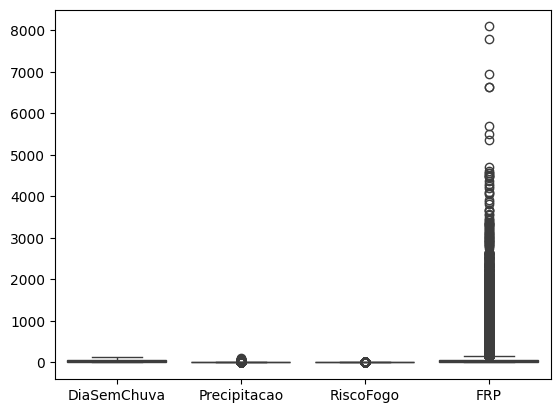

In [ ]:
import seaborn as sns
sns.boxplot(data=df[['DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP']])

In [ ]:
df.drop_duplicates(inplace=True)
# Removendo duplicatas

In [ ]:
df['DataHora'] = pandas.to_datetime(df['DataHora']) # Convertendo para datetime

In [ ]:
df.dtypes

,0
DataHora,datetime64[ns]
Satelite,object
Pais,object
Estado,object
Municipio,object
Bioma,object
DiaSemChuva,float64
Precipitacao,float64
RiscoFogo,float64
Latitude,float64


In [ ]:
# Adicionar coluna de mês

df['Mes'] = df['DataHora'].dt.month
df.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Mes
1,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7,1
2,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0,1
3,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9,1
4,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7,1
5,2024-01-02 17:06:00,AQUA_M-T,Brasil,MA,CAXIAS,Cerrado,1.0,7.44,0.00,-4.73447,-42.98536,10.4,1


In [ ]:
df['Mes'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

In [ ]:
gdf.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Mes,geometry
1,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7,1,POINT (-38.88316 -7.49188)
2,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0,1,POINT (-39.44122 -6.50564)
3,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9,1,POINT (-39.43422 -6.50409)
4,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7,1,POINT (-39.59352 -5.74166)
5,2024-01-02 17:06:00,AQUA_M-T,Brasil,MA,CAXIAS,Cerrado,1.0,7.44,0.00,-4.73447,-42.98536,10.4,1,POINT (-42.98536 -4.73447)


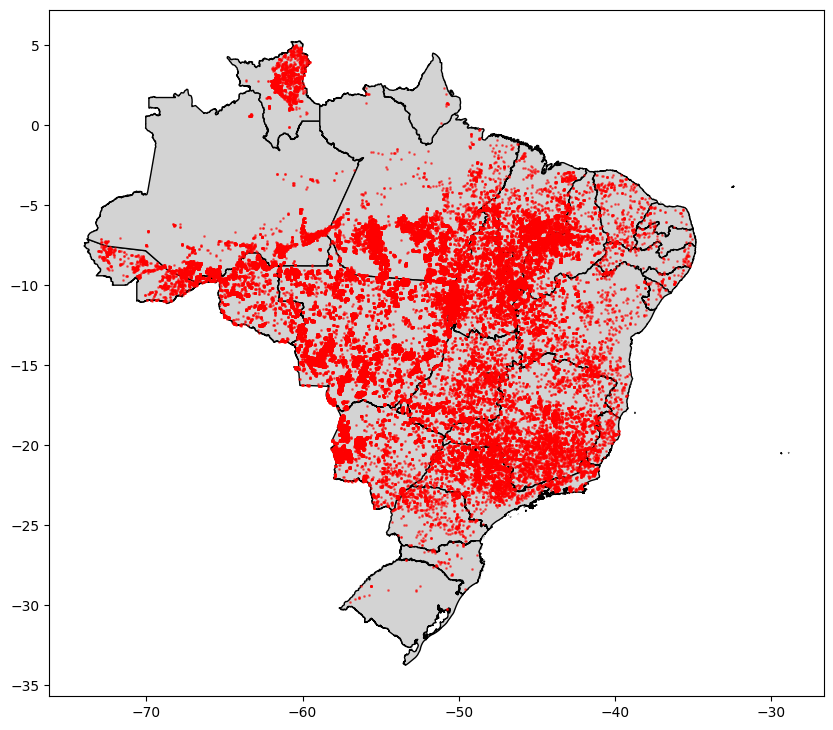

In [ ]:
gdf = gdf.to_crs(crs='EPSG:4326')

states = read_state(year=2020)

gdf_filtered = gdf[gdf['RiscoFogo'] == 1]

fig, ax = plt.subplots(figsize=(10, 10))
states.plot(ax=ax, color='lightgray', edgecolor='black')

gdf_filtered.plot(ax=ax, markersize=1, color='red', alpha=0.5)

plt.show()

In [ ]:
gdf.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Mes,geometry
1,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7,1,POINT (-38.88316 -7.49188)
2,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0,1,POINT (-39.44122 -6.50564)
3,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9,1,POINT (-39.43422 -6.50409)
4,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7,1,POINT (-39.59352 -5.74166)
5,2024-01-02 17:06:00,AQUA_M-T,Brasil,MA,CAXIAS,Cerrado,1.0,7.44,0.00,-4.73447,-42.98536,10.4,1,POINT (-42.98536 -4.73447)


In [ ]:
gdf.describe()

,DataHora,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Mes
count,172826,172826.000000,172826.000000,172826.000000,172826.000000,172826.000000,172826.000000,172826.000000
mean,2024-07-27 04:18:56.286669824,41.467974,0.290123,0.834607,-11.387135,-54.050898,75.359033,7.356063
min,2024-01-01 16:24:00,0.000000,0.000000,0.000000,-32.345020,-73.659040,0.000000,1.000000
25%,2024-07-19 17:17:00,10.000000,0.000000,0.820000,-15.137932,-58.622972,15.700000,7.000000
50%,2024-08-19 18:32:00,25.000000,0.000000,1.000000,-9.876650,-54.369260,31.200000,8.000000
75%,2024-09-02 18:09:00,70.000000,0.000000,1.000000,-7.260072,-48.961952,69.100000,9.000000
max,2024-09-15 18:49:00,120.000000,96.440000,1.000000,5.155660,-35.059390,8094.300000,9.000000
std,NaN,38.382449,2.190336,0.301111,6.118793,6.886233,169.703256,1.937439


In [ ]:
gdf.to_file('queimadas.geojson', driver='GeoJSON')
gdf.to_csv('queimadasgdp.csv')

df.to_csv('queimadas.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Mes
1,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,BREJO SANTO,Caatinga,0.0,0.00,0.07,-7.49188,-38.88316,51.7,1
2,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.25,-6.50564,-39.44122,29.0,1
3,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,CARIÚS,Caatinga,0.0,0.00,0.23,-6.50409,-39.43422,18.9,1
4,2024-01-02 17:06:00,AQUA_M-T,Brasil,CE,MOMBAÇA,Caatinga,0.0,0.00,0.00,-5.74166,-39.59352,25.7,1
5,2024-01-02 17:06:00,AQUA_M-T,Brasil,MA,CAXIAS,Cerrado,1.0,7.44,0.00,-4.73447,-42.98536,10.4,1
